In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.expand_frame_repr', False)

Read CSV File

In [2]:
# Load the CSV file
# data = pd.read_csv('/Users/minhbui/Documents/Biokind/2024 WMTV Diaper Drive.csv')
data = pd.read_csv('/Users/minhbui/Documents/Biokind/2023 Bottoms Up Ball - Active.csv')
# data = pd.read_csv('/Users/minhbui/Documents/Biokind/2022 Bottoms Up Ball - Active.csv')
data_analyze = data.copy()
# print(data_analyze.head(10))
# print(data.head(5))

Clean data for City and State and format datetime

In [3]:
# Remove any leading/trailing whitespace characters from column names
data_analyze.columns = data_analyze.columns.str.strip()


# Standardize 'City' column to title case to avoid duplicates due to case sensitivity
data_analyze['City'] = data_analyze['City'].str.title()

# Fill missing values in 'City' and 'State/Province' with 'Unknown'
data_analyze['City'] = data_analyze['City'].str.strip().fillna('Unknown')
data_analyze['State/Province'] = data_analyze['State/Province'].str.strip().fillna('Unknown')

# This creates a mask to find rows where "City" contains only digits
number_only_cities = data_analyze['City'].astype(str).str.isdigit()

# Replace number-only cities with "Unknown"
data_analyze.loc[number_only_cities, 'City'] = "Unknown"

# Convert 'Donation Date' to datetime format
data_analyze['Donation Date'] = pd.to_datetime(data_analyze['Donation Date'])
# print(data.head(10))


Analyze based on donation date

In [4]:
# Group by Donation Date and calculate total donations
total_donations_date = data_analyze.groupby('Donation Date')['Donation Amount'].sum().reset_index()
print(total_donations_date)

   Donation Date  Donation Amount
0     2023-02-11            12.00
1     2023-04-12          2000.00
2     2023-04-13           518.15
3     2023-04-26           248.71
4     2023-04-27           155.45
5     2023-05-08          2500.00
6     2023-05-10          1000.00
7     2023-05-24          5000.00
8     2023-05-25         10000.00
9     2023-05-26           368.71
10    2023-05-30           248.71
11    2023-05-31          2279.86
12    2023-06-08         12000.00
13    2023-06-12           259.07
14    2023-07-13          5000.00
15    2023-07-14          2590.75
16    2023-08-02           300.00
17    2023-08-12           259.07
18    2023-08-14           259.07
19    2023-08-15           388.61
20    2023-08-17          1036.30
21    2023-08-18           310.89
22    2023-08-19           310.89
23    2023-08-22           310.89
24    2023-08-23          2500.00
25    2023-08-26           259.07
26    2023-08-27           300.00
27    2023-08-29             0.00
28    2023-08-

In [5]:
# Group by Donation Date and calculate average donation amount
average_donations_date = data_analyze.groupby('Donation Date')['Donation Amount'].mean().reset_index()
print(average_donations_date)

   Donation Date  Donation Amount
0     2023-02-11        12.000000
1     2023-04-12      2000.000000
2     2023-04-13       518.150000
3     2023-04-26       248.710000
4     2023-04-27       155.450000
5     2023-05-08      2500.000000
6     2023-05-10      1000.000000
7     2023-05-24      5000.000000
8     2023-05-25     10000.000000
9     2023-05-26       184.355000
10    2023-05-30       248.710000
11    2023-05-31       569.965000
12    2023-06-08      3000.000000
13    2023-06-12       259.070000
14    2023-07-13      5000.000000
15    2023-07-14      2590.750000
16    2023-08-02       300.000000
17    2023-08-12       259.070000
18    2023-08-14       259.070000
19    2023-08-15       194.305000
20    2023-08-17      1036.300000
21    2023-08-18       310.890000
22    2023-08-19       310.890000
23    2023-08-22       310.890000
24    2023-08-23      2500.000000
25    2023-08-26       259.070000
26    2023-08-27       300.000000
27    2023-08-29         0.000000
28    2023-08-

In [6]:
# Group by Donation Date and count the number of donations
donation_counts_date = data_analyze.groupby('Donation Date')['Donation Amount'].count().reset_index()
print(donation_counts_date)

   Donation Date  Donation Amount
0     2023-02-11                1
1     2023-04-12                1
2     2023-04-13                1
3     2023-04-26                1
4     2023-04-27                1
5     2023-05-08                1
6     2023-05-10                1
7     2023-05-24                1
8     2023-05-25                1
9     2023-05-26                2
10    2023-05-30                1
11    2023-05-31                4
12    2023-06-08                4
13    2023-06-12                1
14    2023-07-13                1
15    2023-07-14                1
16    2023-08-02                1
17    2023-08-12                1
18    2023-08-14                1
19    2023-08-15                2
20    2023-08-17                1
21    2023-08-18                1
22    2023-08-19                1
23    2023-08-22                1
24    2023-08-23                1
25    2023-08-26                1
26    2023-08-27                1
27    2023-08-29                1
28    2023-08-

Analyze data based on location

In [7]:
# Group by City and State/Province and calculate total donations
location_analysis = data_analyze.groupby(['City', 'State/Province']).agg({'Donation Amount': ['sum', 'mean', 'count']}).reset_index()



# Rename columns for better readability
location_analysis.columns = ['City', 'State/Province', 'Total Donation Amount', 'Average Donation Amount', 'Number of Donations']

location_analysis = location_analysis.sort_values(by='Total Donation Amount', ascending=False).reset_index(drop=True)

# Display the location-based analysis
print(location_analysis)

# location_analysis.to_csv('location_based_analysis.csv', index=False)


             City State/Province  Total Donation Amount  Average Donation Amount  Number of Donations
0         Unknown        Unknown               58181.02               328.706328                  177
1         Madison             WI               46683.99               993.276383                   47
2        Richmond             TX               15101.81              2516.968333                    6
3      Janesville             WI                5000.00              5000.000000                    1
4    Longboat Key             FL                5000.00              5000.000000                    1
5       Cambridge             WI                4476.85               120.995946                   37
6       Middleton             WI                4394.74               338.056923                   13
7     Sun Prairie             WI                4341.68               723.613333                    6
8          Monona             WI                3018.15              1509.075000  

Plot the data based on location

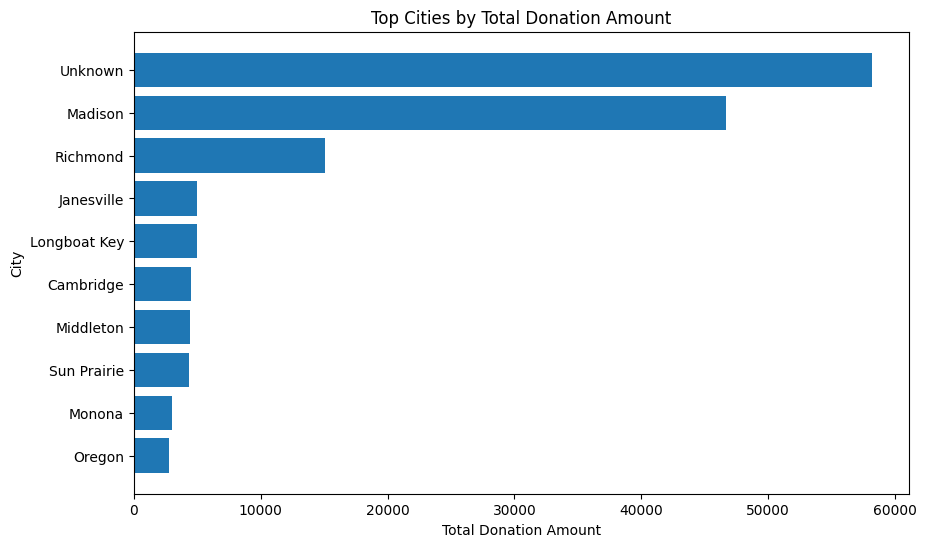

In [8]:
# Sort and select top cities if needed (e.g., top 10)
top_cities = location_analysis.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_cities['City'], top_cities['Total Donation Amount'])
plt.title('Top Cities by Total Donation Amount')
plt.xlabel('Total Donation Amount')
plt.ylabel('City')
plt.gca().invert_yaxis()  # Highest value at the top
plt.show()

Draw heatmap based on city and state

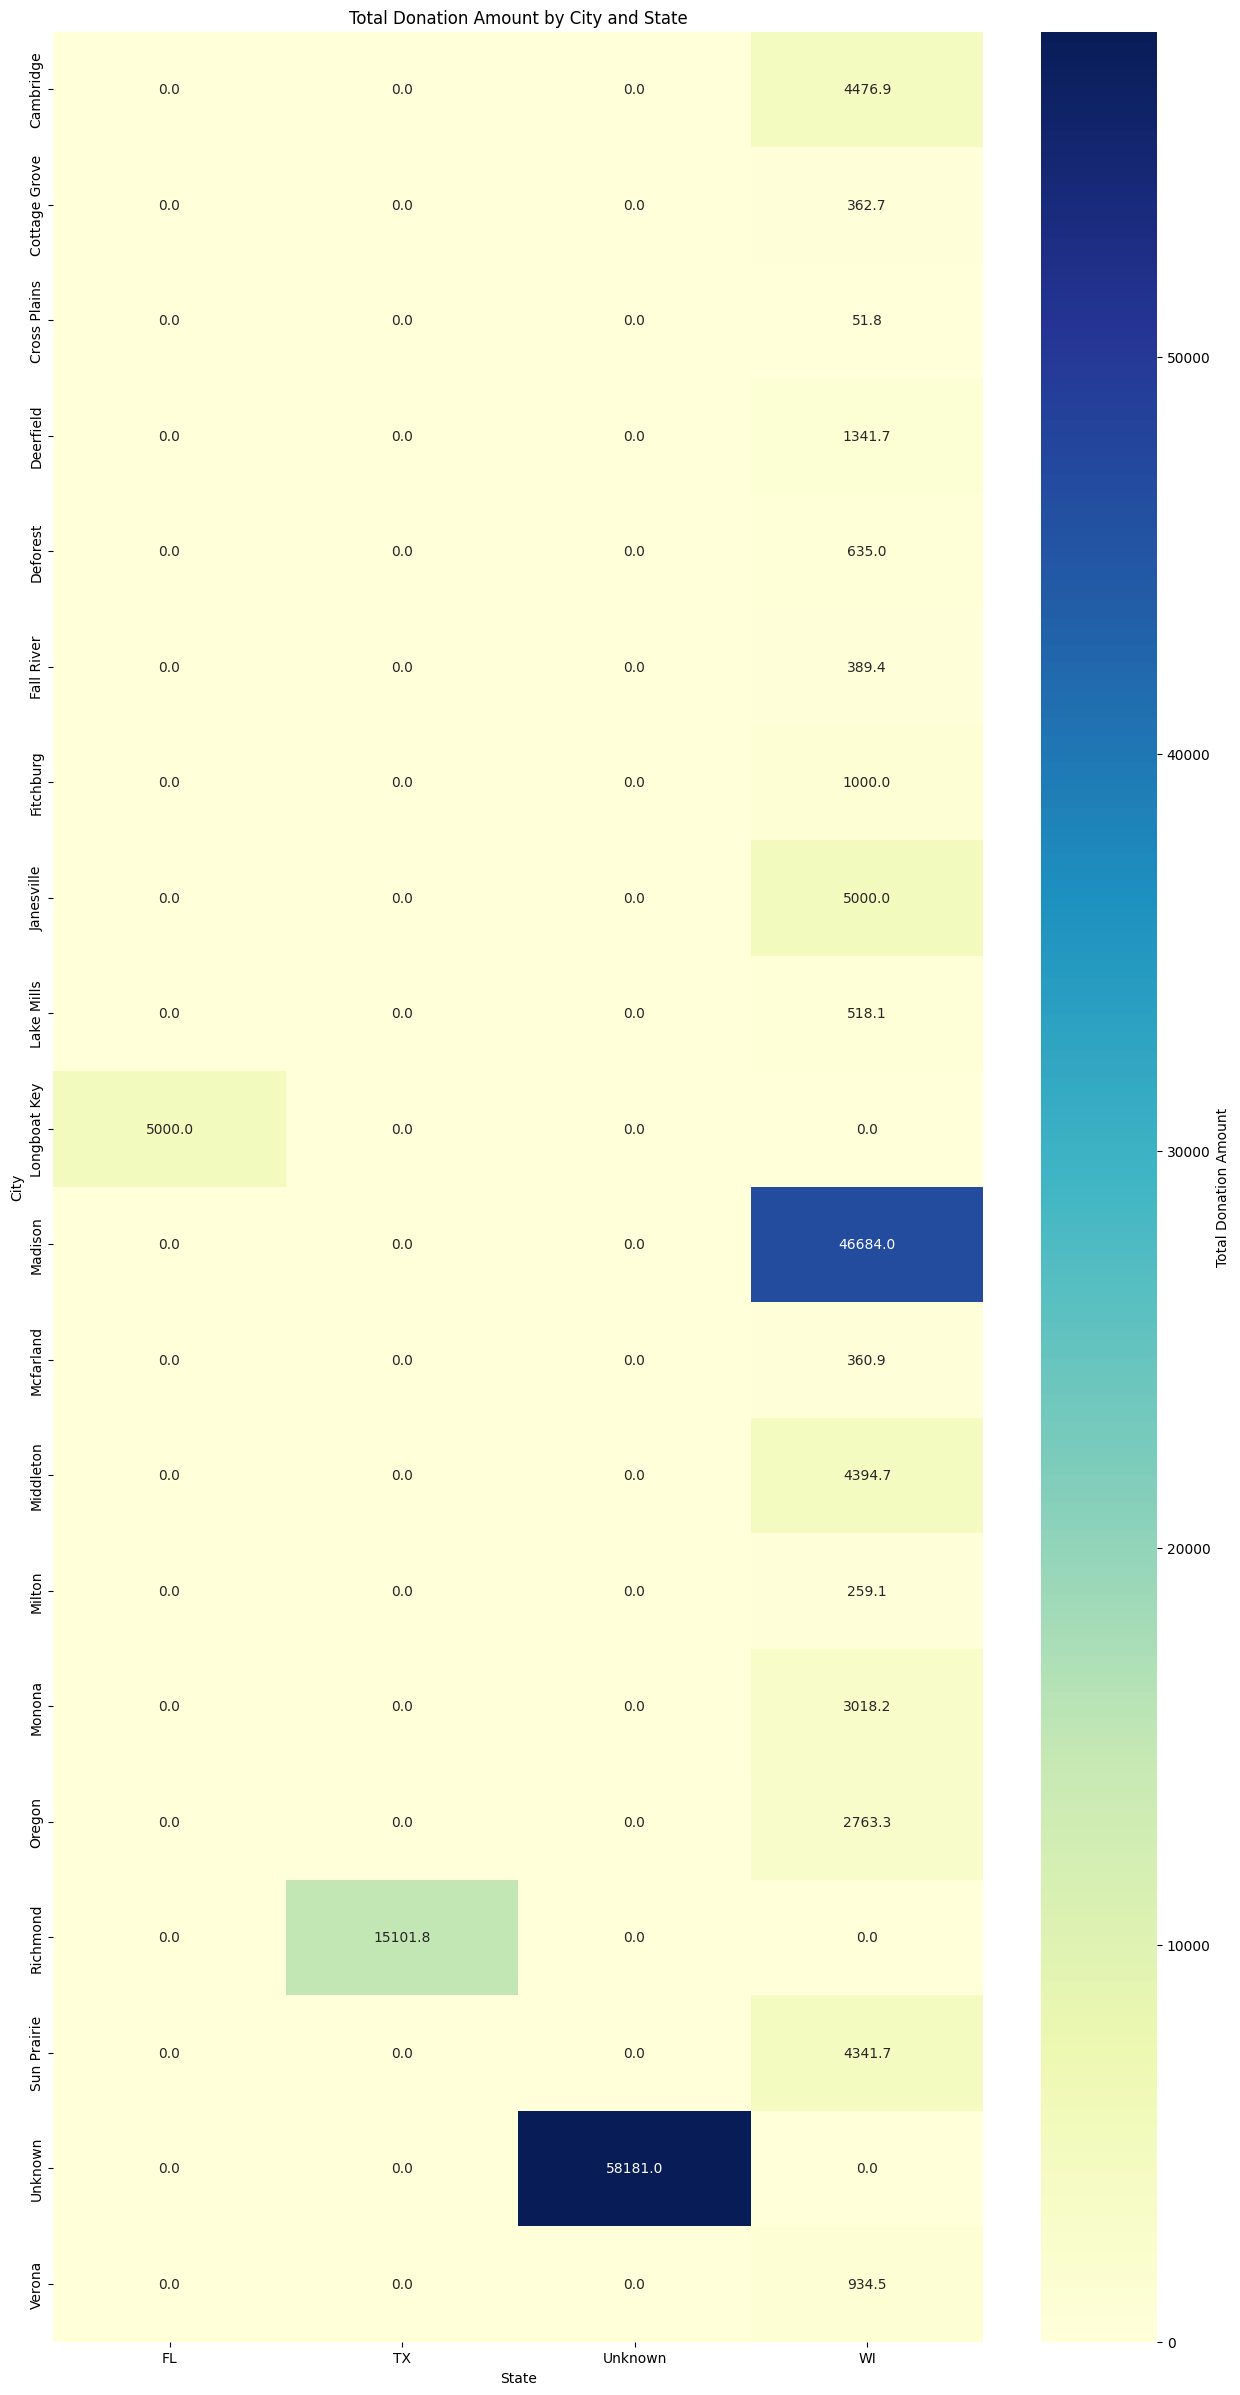

In [9]:
# Pivot table for heatmap
location_pivot = location_analysis.pivot(index='City', columns='State/Province', values='Total Donation Amount').fillna(0)

plt.figure(figsize=(15, 30))
sns.heatmap(location_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Total Donation Amount'})
plt.title('Total Donation Amount by City and State')
plt.xlabel('State')
plt.ylabel('City')
plt.show()

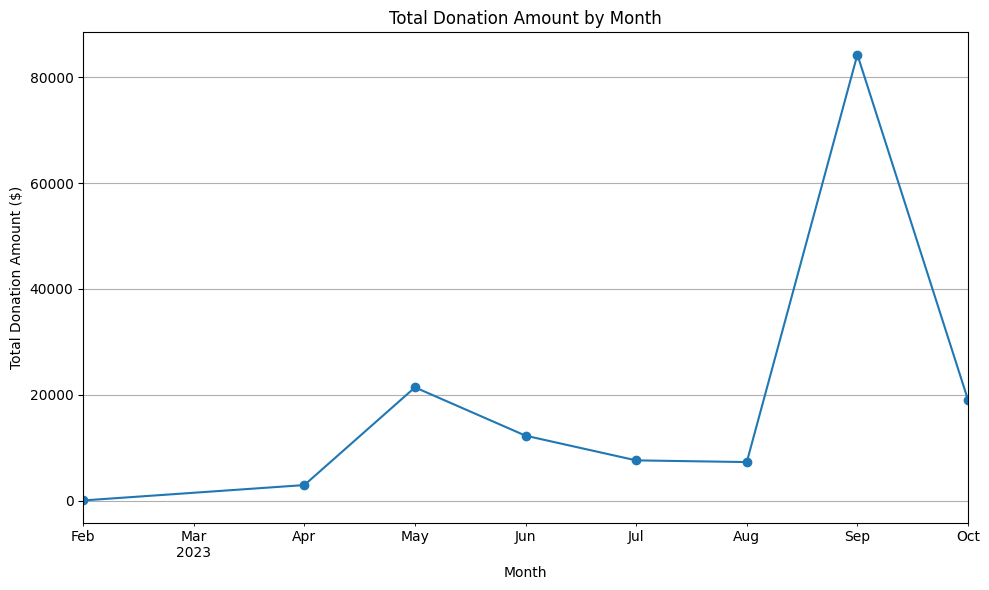

In [10]:
# Ensure the Donation Date column is converted to datetime in the correct DataFrame
data_analyze['Donation Date'] = pd.to_datetime(data_analyze['Donation Date'], errors='coerce')

# Group by month and sum donation amounts
monthly_donations = data_analyze.groupby(data_analyze['Donation Date'].dt.to_period('M'))['Donation Amount'].sum()

# Plot using pandas
monthly_donations.plot(kind='line', figsize=(10, 6), marker='o', title='Total Donation Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Donation Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()